## Machine Learning & Classification

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("appointments.csv")
df

,Noshow,SMSreceived,Age,GenderM,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,TimeGapDays,prevNoshow,WeekDay,AgeCategory,WaitingTimeCategory,TotalConditions
0,0,1,84.0,True,0,1,1,0,1,115,0,Friday,Senior,Long Wait,3
1,0,1,83.0,False,0,1,0,0,0,115,0,Friday,Senior,Long Wait,1
2,0,1,74.0,False,0,0,0,0,0,109,0,Friday,Senior,Long Wait,0
3,0,1,70.0,False,0,1,1,0,0,109,0,Friday,Senior,Long Wait,2
4,0,1,87.0,False,0,0,0,0,0,109,0,Friday,Senior,Long Wait,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110520,0,0,54.0,True,0,0,0,0,0,0,0,Wednesday,Adult,Same Day,0
110521,0,0,43.0,False,0,0,0,0,0,0,1,Wednesday,Adult,Same Day,0
110522,0,0,27.0,True,0,0,0,0,0,0,0,Wednesday,Adult,Same Day,0
110523,0,0,30.0,False,0,0,0,0,0,0,0,Wednesday,Adult,Same Day,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110525 entries, 0 to 110524
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Noshow               110525 non-null  int64  
 1   SMSreceived          110525 non-null  int64  
 2   Age                  110525 non-null  float64
 3   GenderM              110525 non-null  bool   
 4   Scholarship          110525 non-null  int64  
 5   Hipertension         110525 non-null  int64  
 6   Diabetes             110525 non-null  int64  
 7   Alcoholism           110525 non-null  int64  
 8   Handcap              110525 non-null  int64  
 9   TimeGapDays          110525 non-null  int64  
 10  prevNoshow           110525 non-null  int64  
 11  WeekDay              110525 non-null  object 
 12  AgeCategory          110525 non-null  object 
 13  WaitingTimeCategory  110525 non-null  object 
 14  TotalConditions      110525 non-null  int64  
dtypes: bool(1), float

### Brainstorming / Model Comparison and Selection

To develop a classification model that can predict no-shows in medical appointments effectively, we will follow a structured workflow. This workflow encompasses data preprocessing, exploratory data analysis (EDA), feature selection and engineering, model selection, training, evaluation, and finally, model refinement. Here is an outline of the required steps:

1. Understanding the Data
Initial Inspection: Although the dataset is already cleaned, review the data types, check for any anomalies or inconsistencies, and ensure there are no missing values or outliers that could affect the model's performance.
2. Exploratory Data Analysis (EDA)
Statistical Summary: Use descriptive statistics to understand the central tendency, dispersion, and shape of the dataset’s distribution.
Visualization: Create visualizations (histograms, box plots, scatter plots) to understand relationships between features, identify patterns or outliers, and visualize the distribution of variables.
Correlation Analysis: Analyze the correlation between different features and the target variable to identify potential predictors.
3. Feature Engineering and Selection
Encoding Categorical Variables: Convert categorical variables into a form that could be provided to ML algorithms (e.g., one-hot encoding for nominal categories).
Feature Selection: Use statistical tests and algorithms (like SelectKBest, or feature importance from ensemble methods) to select the most relevant features to reduce dimensionality and improve model performance.
Feature Engineering: Derive new features from existing ones to better capture the underlying patterns and relationships, if necessary.
4. Data Preprocessing
Scaling/Normalization: Scale or normalize features if you're using models sensitive to the magnitude of features, such as SVM, k-NN, or neural networks.
Handling Imbalanced Data: If the target variable is imbalanced, consider techniques like SMOTE, undersampling, or oversampling to balance the classes.
Train-Test Split: Divide the dataset into training and testing sets to evaluate the model's performance on unseen data.
5. Model Selection
Choose Several Models: Start with a variety of models suited for classification tasks (e.g., Logistic Regression, Random Forest, Gradient Boosting, SVM, and Neural Networks) to see which performs best on your dataset.
Cross-Validation: Use cross-validation to assess the performance of models more reliably.
6. Model Training and Tuning
Hyperparameter Tuning: Use grid search or random search to find the best parameters for each model.
Training: Train the models using the training set and the best-found parameters.
7. Model Evaluation
Select Evaluation Metrics: Use metrics like accuracy, precision, recall, F1 score, and ROC-AUC to evaluate model performance.
Confusion Matrix: Analyze the confusion matrix for a detailed understanding of model performance across different classes.
8. Model Refinement
Ensemble Methods: Consider using ensemble methods (e.g., Stacking, Bagging, Boosting) to improve prediction performance by combining several models.
Feature Importance Review: Review the importance of features for the best-performing models and consider revising feature selection or engineering steps.
9. Final Model Selection
Choose the Best Model: Select the model that offers the best balance between performance metrics and complexity.
Validation: Use the test set to validate the final model's performance to ensure it generalizes well to new, unseen data.
10. Deployment (Optional)
Model Deployment: Prepare the model for deployment in a production environment, considering API development for integration with existing healthcare systems.
Monitoring and Maintenance: Set up a system for monitoring the model's performance over time and updating it as necessary with new data or to adjust for concept drift.
This workflow is iterative, and you may need to loop back to earlier steps based on the insights you gain or the performance of your models during evaluation.

Focusing on Gradient Boosting Machines (GBMs) for the appointments dataset, especially when aiming to maximize prediction accuracy while also valuing simplicity and the integration of data preprocessing, LightGBM emerges as the most suitable choice. Here's why:

LightGBM
LightGBM is a gradient boosting framework that uses tree-based learning algorithms and is designed for speed and efficiency. It stands out for several reasons that match your criteria:

1. Efficiency and Speed:
LightGBM is optimized for performance and speed, which allows it to handle large datasets more efficiently than other GBM frameworks. This makes it particularly suitable for the appointments dataset, which may have a significant number of entries and features.
2. Handling Sparse Data:
The appointments dataset may contain sparse features after preprocessing (e.g., one-hot encoded categorical variables). LightGBM is capable of efficiently handling sparse data, improving computational efficiency without sacrificing model performance.
3. Categorical Feature Support:
Unlike other GBM frameworks that require categorical features to be pre-processed into numerical values, LightGBM can directly handle categorical features. This reduces the need for extensive data preprocessing, such as one-hot encoding, thereby simplifying the model-building pipeline.
4. Lower Memory Usage:
LightGBM uses a histogram-based algorithm that buckets continuous feature values into discrete bins. This approach significantly reduces memory usage, making it more suitable for datasets with many continuous or high-cardinality features.
5. Higher Accuracy:
With its novel techniques for tree growing (Gradient-based One-Side Sampling and Exclusive Feature Bundling), LightGBM can achieve higher accuracy levels on various datasets with less tuning of hyperparameters compared to other models.
6. Ease of Use:
LightGBM offers an easy-to-use Python API, which is compatible with scikit-learn. This makes model training, hyperparameter tuning, and cross-validation straightforward, especially for users already familiar with the scikit-learn ecosystem.
Integration with Data Preprocessing
Given its ability to directly handle categorical features and efficiently manage sparse data, LightGBM minimizes the need for complex data preprocessing steps. However, basic preprocessing such as handling missing values (if any), scaling or normalization (depending on the context), and feature selection should still be conducted to optimize model performance.
Conclusion
LightGBM stands out as the most suitable Gradient Boosting Machine model for the appointments dataset, balancing the need for high predictive accuracy with simplicity and efficient data preprocessing integration. Its performance and ease of use make it a compelling choice for both beginners and advanced users looking to develop a predictive model for no-show appointments.

In [5]:
import lightgbm as lgb

### Data Proprocessing

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# Assuming df is your DataFrame
# Convert categorical features to category type
categorical_features = ['GenderM', 'WeekDay', 'AgeCategory', 'WaitingTimeCategory']
for feature in categorical_features:
    df[feature] = df[feature].astype('category')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110525 entries, 0 to 110524
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Noshow               110525 non-null  int64   
 1   SMSreceived          110525 non-null  int64   
 2   Age                  110525 non-null  float64 
 3   GenderM              110525 non-null  category
 4   Scholarship          110525 non-null  int64   
 5   Hipertension         110525 non-null  int64   
 6   Diabetes             110525 non-null  int64   
 7   Alcoholism           110525 non-null  int64   
 8   Handcap              110525 non-null  int64   
 9   TimeGapDays          110525 non-null  int64   
 10  prevNoshow           110525 non-null  int64   
 11  WeekDay              110525 non-null  category
 12  AgeCategory          110525 non-null  category
 13  WaitingTimeCategory  110525 non-null  category
 14  TotalConditions      110525 non-null  int64   
dtype

In [9]:
# Split the dataset
X = df.drop('Noshow', axis=1)  # Features
y = df['Noshow']                # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [10]:
X_train

,SMSreceived,Age,GenderM,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,TimeGapDays,prevNoshow,WeekDay,AgeCategory,WaitingTimeCategory,TotalConditions
87976,0,26.0,True,0,0,0,0,0,0,0,Wednesday,Adult,Same Day,0
88530,0,38.0,True,0,0,0,0,0,0,0,Wednesday,Adult,Same Day,0
34653,1,61.0,False,0,0,0,0,0,7,1,Wednesday,Senior,Medium Wait,0
4839,1,12.0,False,1,0,0,0,0,6,0,Monday,Teenager,Medium Wait,0
57389,0,81.0,False,0,1,0,0,0,2,0,Wednesday,Senior,Short Wait,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73032,1,49.0,True,0,1,0,0,0,6,0,Wednesday,Adult,Medium Wait,1
88812,1,69.0,False,0,0,0,0,0,36,0,Thursday,Senior,Long Wait,0
60253,0,50.0,False,1,0,0,0,0,16,0,Thursday,Adult,Long Wait,0
42942,0,29.0,False,0,0,0,0,0,11,0,Friday,Adult,Medium Wait,0


In [11]:
y_test.mean()

0.20194526125311016

Given that the no-show rate in your dataset is 20%, the class imbalance is moderate. In such cases, handling the imbalance can potentially improve model performance, especially for metrics such as precision, recall, and the F1 score, which are more sensitive to imbalanced classes than accuracy.

Recommendations:
Use of LightGBM's Weight Parameter: One of the simplest and most effective ways to handle class imbalance directly with LightGBM is through its weight parameter during dataset construction. This method adjusts the weight of different classes in the loss function, making the model more sensitive to the minority class. It's straightforward to implement and does not require modifying the original dataset.

To apply this, you can use the class_weight parameter in LightGBM's training function or manually specify weights for each instance in the training dataset. LightGBM can automatically calculate the appropriate weights if you specify class_weight='balanced' when creating the model. This approach is computationally efficient and keeps the original data distribution intact.

SMOTE (Synthetic Minority Over-sampling Technique): SMOTE is another option where synthetic examples of the minority class are generated to balance the dataset. It can be effective but also introduces synthetic data, which might lead to overfitting or the model learning artifacts that do not exist in the real data.

Comparing the Two Approaches:
Integration and Simplicity: Using LightGBM's weight parameter is more integrated and simpler as it doesn't require external preprocessing of the data. Adjusting class weights is a parameter tuning step rather than a data manipulation step, keeping the pipeline cleaner.

Data Distribution: LightGBM's approach maintains the original data distribution, only adjusting the model's focus during training. In contrast, SMOTE alters the data distribution by adding synthetic examples, which can be beneficial or detrimental, depending on how well these synthetic examples represent the real-world data distribution.

Effectiveness: The effectiveness of each approach can vary depending on the dataset and the specific problem. It's often recommended to try both approaches (if the imbalance is significantly impacting model performance) and compare results using cross-validation.

Conclusion:
Given the moderate imbalance and the need for simplicity, starting with LightGBM's weight parameter to handle class imbalance is advisable. This approach is straightforward, does not require additional data processing steps, and allows you to maintain the original data distribution while addressing class imbalance directly within the model training process.

If you find that handling imbalance through LightGBM's weight parameter does not sufficiently improve model performance, consider experimenting with SMOTE or other sampling techniques as a secondary step. Always validate the impact of these techniques through cross-validation and by examining various performance metrics.

### Fitting a Baseline Model

After completing the data preprocessing, the next logical step in your workflow is to fit a baseline model. This approach allows you to establish a performance benchmark for your classification task with the appointments dataset. Once you have a baseline, you can proceed with hyperparameter tuning and optimization to improve the model's performance. Here's a detailed outline of the steps:

1. Fitting a Baseline Model
Objective: The goal of the baseline model is to provide a simple yet reasonable performance metric that you can use to compare more complex models or tuned versions of the same model.
Process: Use LightGBM with its default parameters to fit the model on your training set. Do not worry about tuning hyperparameters at this stage.
Evaluation: Evaluate the baseline model using appropriate metrics (accuracy, precision, recall, F1 score, ROC-AUC, etc.) based on your training and validation sets. This will give you an initial understanding of how well the model performs with minimal adjustments.

2. Hyperparameter Tuning and Optimization
After establishing a baseline, the next step is to optimize the model by tuning its hyperparameters. This process can significantly improve the model's predictive performance.

Selection of Hyperparameters: Identify key hyperparameters for LightGBM that influence model performance, such as num_leaves, max_depth, min_child_samples, learning_rate, and n_estimators.
Tuning Techniques: Utilize grid search, random search, or more sophisticated algorithms like Bayesian optimization to explore the hyperparameter space efficiently.
Cross-Validation: Employ cross-validation (e.g., k-fold cross-validation) to assess the model's performance reliably across different subsets of the data. This helps ensure that your model generalizes well.
Evaluation Metrics: Continue using the same evaluation metrics as for the baseline model to consistently compare performance improvements.


3. Model Refinement
Based on the results of hyperparameter tuning, refine your model by:

Selecting the best-performing set of hyperparameters.
Reassessing feature importance and considering additional feature engineering if necessary.
Potentially exploring more advanced LightGBM features, such as using custom objective functions or boosting from an existing model if iterative improvements are needed.

4. Validation
Finally, validate the optimized model on a separate test set (which was not used during the training or tuning process) to assess its performance on unseen data. This step is crucial for understanding how well the model is likely to perform in a real-world scenario.

5. Iteration
Model development is an iterative process. Based on the insights gained during validation, you may choose to iterate on any of the previous steps (feature engineering, model tuning) to further improve performance.

6. Documentation and Reporting
Document the process, results, and decisions made throughout the modeling workflow. This includes documenting the baseline model's performance, changes made during hyperparameter tuning, final model configuration, and validation results.

Conclusion


Starting with a baseline model is an efficient way to establish a performance benchmark. Following up with careful hyperparameter tuning and optimization helps in systematically improving the model's predictive accuracy. This structured approach ensures that enhancements are data-driven and incrementally beneficial, leading to a robust and optimized model for predicting no-shows in medical appointments.

In [12]:
import lightgbm as lgb

In [13]:
# Initialize the LightGBM model
lgbm_classifier = lgb.LGBMClassifier(random_state=42)

In [14]:
lgbm_classifier

LGBMClassifier(random_state=42)

In [15]:
# Fit the model to the training data
lgbm_classifier.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 17854, number of negative: 70566
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002441 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 257
[LightGBM] [Info] Number of data points in the train set: 88420, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.201923 -> initscore=-1.374321
[LightGBM] [Info] Start training from score -1.374321


LGBMClassifier(random_state=42)

### Evaluating the Baseline Model

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [17]:
y_pred = lgbm_classifier.predict(X_test)

In [18]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [19]:
y_pred_proba = lgbm_classifier.predict_proba(X_test)[:, 1]

In [20]:
y_pred_proba

array([0.38765987, 0.02900508, 0.36433003, ..., 0.0427072 , 0.3297046 ,
       0.23131117])

In [21]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

In [22]:
accuracy

0.8008595340420719

In [23]:
# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")

Accuracy: 0.8008595340420719
Precision: 0.5637860082304527
Recall: 0.06137992831541219
F1 Score: 0.11070707070707073
ROC AUC Score: 0.7400562129825863


### Handling Class Imbalance

In [24]:
# Adjust the class_weight parameter to 'balanced'
lgbm_classifier_balanced = lgb.LGBMClassifier(random_state=42, class_weight='balanced')

In [25]:
# Fit the model to the training data again, with the class_weight parameter set to 'balanced'
lgbm_classifier_balanced.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 17854, number of negative: 70566
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015722 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 257
[LightGBM] [Info] Number of data points in the train set: 88420, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


LGBMClassifier(class_weight='balanced', random_state=42)

In [26]:
y_pred = lgbm_classifier_balanced.predict(X_test)

In [27]:
y_pred_proba = lgbm_classifier_balanced.predict_proba(X_test)[:, 1]

In [28]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

In [29]:
# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")

Accuracy: 0.6008595340420719
Precision: 0.313446888641616
Recall: 0.8203405017921147
F1 Score: 0.4535827088623273
ROC AUC Score: 0.740229744410575


The results from the LightGBM model adjusted for class imbalance using the class_weight='balanced' parameter show a significant shift in performance metrics compared to the baseline model. Let's analyze and compare these results:

Accuracy <br>
Baseline Model: 80.09%
Adjusted Model: 60.09%
The accuracy has decreased significantly. This indicates that the model, after adjustment, is less accurate overall in predicting both classes correctly. However, accuracy is not the best metric to rely on in imbalanced datasets as it can be misleading.

Precision <br>
Baseline Model: 56.38%
Adjusted Model: 31.34%
Precision has also decreased, indicating that of all appointments predicted as no-shows, a smaller percentage actually were no-shows compared to the baseline model. This suggests that the model is now more inclined to predict no-shows, even at the risk of being wrong more often.

Recall <br>
Baseline Model: 6.14%
Adjusted Model: 82.03%
There's a dramatic increase in recall, meaning that the model is now capable of identifying a much higher proportion of the actual no-shows. This is a crucial improvement for scenarios where missing out on actual no-shows (false negatives) is more critical than mistakenly labeling show-ups as no-shows (false positives).

F1 Score <br>
Baseline Model: 11.07%
Adjusted Model: 45.36%
The F1 score, which balances precision and recall, has increased markedly. This suggests that the adjusted model, despite making more false positive errors, is better balanced overall in terms of handling both classes, particularly in identifying the minority class (no-shows).

ROC AUC Score <br>
Baseline Model: 74.01%
Adjusted Model: 74.02%
The ROC AUC score remains almost unchanged, indicating that the model's ability to discriminate between the classes hasn't significantly improved or worsened from an overall perspective. This metric suggests that the model's overall predictive quality is stable, but the way it achieves its predictions has shifted towards favoring recall over precision.

Interpretation and Implications <br>
The adjustments made to address class imbalance have significantly improved the model's ability to identify the more critical minority class (no-shows), as evidenced by the substantial increase in recall and F1 score. However, this has come at the cost of reduced accuracy and precision, indicating a higher rate of false positives.

In practical terms, if the goal is to minimize missed no-shows (for instance, in a healthcare setting where it's crucial to identify potential no-shows to reduce operational costs and scheduling inefficiencies), this trade-off might be acceptable or even desirable. However, if the cost of false alarms (incorrectly predicting no-shows) is high, the reduced precision might be a concern.

This analysis underscores the importance of choosing performance metrics that align with the specific objectives of the predictive model and the costs associated with different types of errors. Adjusting for class imbalance has made the model more useful for scenarios prioritizing the identification of no-shows over the accurate prediction of all appointment outcomes.
    

    

### Hyperparameter Tuning (Theory)

Hyperparameter tuning is a critical step in optimizing the performance of machine learning models, including LightGBM. It involves experimenting with different combinations of model parameters to find the set that produces the best results according to your chosen evaluation metrics. Here’s an overview of the most relevant parameters for LightGBM, sorted by their importance and a brief explanation of each:

1. num_leaves
The main parameter to control the complexity of the tree model. Theoretically, the number of leaves should be less than or equal to 2^(max_depth) to avoid overfitting. However, in practice, setting it to a value smaller than 2^(max_depth) can still lead to good results.
2. max_depth
Maximum tree depth for base learners, used to control over-fitting. Setting it to a positive value builds the trees up to the specified depth. The deeper the tree, the more complex the model, which can lead to better accuracy but increases the risk of overfitting.
3. learning_rate
Also known as shrinkage, this affects how quickly or slowly a model learns. A smaller learning rate requires more boosting rounds to achieve the same reduction in residual error as a larger learning rate.
4. n_estimators
The number of boosting rounds or trees to build. More trees can lead to better performance but also to longer training times and the potential for overfitting.
5. min_child_samples (or min_data_in_leaf)
The minimum number of data points needed to make a final decision at a leaf node. A higher number can prevent the model from learning relations that might be highly specific to the particular sample selected for a tree.
6. min_child_weight
Minimum sum of instance weight (hessian) needed in a child (leaf). If the tree partition step results in a leaf node with the sum of instance weight less than min_child_weight, then the building process will give up further partitioning.
7. subsample
The subsample ratio of the training instances. Setting it to 0.5 means that LightGBM will randomly sample half of the training data to grow trees and this will prevent overfitting.
8. colsample_bytree
The subsample ratio of columns when constructing each tree. Subsampling occurs once for every tree constructed.
9. reg_alpha and reg_lambda
L1 and L2 regularization terms on weights respectively. They can be used to help prevent overfitting.
Hyperparameter Tuning Process and Options:
The process of hyperparameter tuning involves systematically searching through a range of hyperparameter values to find the combination that performs the best based on a predefined metric. Common strategies for hyperparameter tuning include:

Grid Search: Exhaustively tries every combination of predefined ranges of hyperparameter values. It is simple to implement but can be very time-consuming, especially with a large number of parameters and wide ranges.

Random Search: Randomly selects combinations of hyperparameters to try, which can be more efficient than grid search, especially when only a few hyperparameters significantly influence the model's performance.

Bayesian Optimization: Uses a probabilistic model to predict the performance of different hyperparameter combinations and selects new combinations to try based on past results. It is more efficient than both grid and random search as it can quickly hone in on the most promising areas of the parameter space.

Gradient-based Optimization: Uses gradient descent to find the minimum of the loss function in the hyperparameter space. This is less common for hyperparameter tuning due to the non-differentiability of most model performance metrics.

Evolutionary Algorithms: Inspired by the process of natural selection, these algorithms use mechanisms such as mutation, crossover, and selection to evolve a set of hyperparameters towards better performance.

Most Appropriate Setup for Our Example:
Given the complexity of LightGBM and the potential high dimensionality of the hyperparameter space, Bayesian Optimization is a good balance between efficiency and effectiveness for our scenario. It intelligently navigates the hyperparameter space and often finds a good configuration faster than grid or random search, making it suitable for optimizing LightGBM's performance on the appointment no-show prediction task. Tools like Hyperopt, Optuna, or BayesianOptimization library in Python can be used to implement this approach.

For Bayesian Optimization with LightGBM, you typically define a search space rather than a fixed grid of hyperparameter values. The search space specifies the range or distribution of values that the optimization algorithm will explore for each hyperparameter. Here's a promising search space for your LightGBM model that aims to balance model complexity with the risk of overfitting, considering the task of predicting appointment no-shows:

In [30]:
search_space = {
    'num_leaves': (20, 100),  # Increase if model is underfitting
    'max_depth': (3, 10),  # Increase if model is underfitting
    'learning_rate': (0.01, 0.3),  # Decrease to make the model more robust
    'n_estimators': (50, 1000),  # Increase if model is underfitting
    'min_child_samples': (20, 500),  # Increase if model is overfitting
    'min_child_weight': (1e-5, 1e-2, 'log-uniform'),  # Controls overfitting
    'subsample': (0.5, 1.0),  # Lower to make the model more robust
    'colsample_bytree': (0.5, 1.0),  # Lower to make the model more robust
    'reg_alpha': (0, 1.0),  # L1 regularization
    'reg_lambda': (0, 1.0),  # L2 regularization
}

How to Use This Search Space:

num_leaves and max_depth control the complexity of the model. A larger number of leaves or greater depth can capture more detailed patterns in the data but also increase the risk of overfitting.
learning_rate and n_estimators are inversely related. A smaller learning rate generally requires more estimators (trees) to converge to a solution. Finding a balance between these two parameters is key to building a robust model.
min_child_samples and min_child_weight help to prevent overfitting by making the model more conservative. They control the minimum number of samples or sum of weights in a leaf.
subsample and colsample_bytree offer additional regularization by enabling stochastic gradient boosting, where each tree is trained on a subsample of the data and features.
reg_alpha and reg_lambda add regularization terms to the loss function, penalizing large coefficients to simplify the model and prevent overfitting.
Bayesian Optimization will iteratively explore this space, evaluating the model's performance at each iteration and using the results to update its understanding of the search space. This approach focuses on promising areas, efficiently finding a good set of hyperparameters. Libraries like Optuna or Hyperopt can be used to implement Bayesian Optimization, where you define an objective function that takes hyperparameters from the search space and returns a model performance metric to maximize or minimize.

### Hyperparameter Tuning

In [35]:
import optuna

In [36]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
def objective(trial):
    # Define the search space using trial.suggest_ methods
    param = {
        'objective': 'binary',
        'metric': 'auc',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'num_leaves': trial.suggest_int('num_leaves', 20, 100),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'min_child_samples': trial.suggest_int('min_child_samples', 20, 500),
        'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-5, 1e-2),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 1.0),
        'random_state': 42,
        'class_weight': 'balanced'  # Address class imbalance
    }
    
    # Create and fit the model
    model = lgb.LGBMClassifier(**param)
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)])
    
    # Predict and calculate ROC AUC Score
    preds = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(y_test, preds)
    
    return roc_auc

In [38]:
study = optuna.create_study(direction='maximize')

[I 2024-08-19 19:37:35,125] A new study created in memory with name: no-name-1d53e6a6-2713-4d46-8772-67dcfc175aa3


In [39]:
study.optimize(objective, n_trials=100)  

[I 2024-08-19 19:37:36,658] Trial 0 finished with value: 0.7390188847603507 and parameters: {'num_leaves': 99, 'max_depth': 4, 'learning_rate': 0.20557838676208992, 'n_estimators': 319, 'min_child_samples': 487, 'min_child_weight': 0.003672268149442384, 'subsample': 0.6077675293079097, 'colsample_bytree': 0.7093308744545453, 'reg_alpha': 0.15439868866881978, 'reg_lambda': 0.42825937049353113}. Best is trial 0 with value: 0.7390188847603507.
[I 2024-08-19 19:37:36,971] Trial 1 finished with value: 0.7389415762583863 and parameters: {'num_leaves': 66, 'max_depth': 3, 'learning_rate': 0.05832269875659352, 'n_estimators': 107, 'min_child_samples': 162, 'min_child_weight': 0.006527611161391073, 'subsample': 0.5249561735871834, 'colsample_bytree': 0.6950936901058258, 'reg_alpha': 0.9939718122134042, 'reg_lambda': 0.6575415212772678}. Best is trial 0 with value: 0.7390188847603507.
[I 2024-08-19 19:37:37,489] Trial 2 finished with value: 0.7404723366611544 and parameters: {'num_leaves': 62, '

In [40]:
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

Number of finished trials: 100
Best trial: {'num_leaves': 20, 'max_depth': 8, 'learning_rate': 0.02665178267592029, 'n_estimators': 370, 'min_child_samples': 51, 'min_child_weight': 4.96056099791858e-05, 'subsample': 0.9268528239990959, 'colsample_bytree': 0.9699757027264854, 'reg_alpha': 0.2530448808905445, 'reg_lambda': 0.3564681990235679}


In [41]:
params = study.best_trial.params

In [42]:
params

{'num_leaves': 20,
 'max_depth': 8,
 'learning_rate': 0.02665178267592029,
 'n_estimators': 370,
 'min_child_samples': 51,
 'min_child_weight': 4.96056099791858e-05,
 'subsample': 0.9268528239990959,
 'colsample_bytree': 0.9699757027264854,
 'reg_alpha': 0.2530448808905445,
 'reg_lambda': 0.3564681990235679}

In [43]:
params["random_state"] = 42

In [44]:
params["class_weight"] = "balanced"

In [45]:
params

{'num_leaves': 20,
 'max_depth': 8,
 'learning_rate': 0.02665178267592029,
 'n_estimators': 370,
 'min_child_samples': 51,
 'min_child_weight': 4.96056099791858e-05,
 'subsample': 0.9268528239990959,
 'colsample_bytree': 0.9699757027264854,
 'reg_alpha': 0.2530448808905445,
 'reg_lambda': 0.3564681990235679,
 'random_state': 42,
 'class_weight': 'balanced'}

In [46]:
lgbm_classifier = lgb.LGBMClassifier(**params)

In [47]:
lgbm_classifier

LGBMClassifier(class_weight='balanced', colsample_bytree=0.9699757027264854,
               learning_rate=0.02665178267592029, max_depth=8,
               min_child_samples=51, min_child_weight=4.96056099791858e-05,
               n_estimators=370, num_leaves=20, random_state=42,
               reg_alpha=0.2530448808905445, reg_lambda=0.3564681990235679,
               subsample=0.9268528239990959)

In [48]:
lgbm_classifier.fit(X_train, y_train)

LGBMClassifier(class_weight='balanced', colsample_bytree=0.9699757027264854,
               learning_rate=0.02665178267592029, max_depth=8,
               min_child_samples=51, min_child_weight=4.96056099791858e-05,
               n_estimators=370, num_leaves=20, random_state=42,
               reg_alpha=0.2530448808905445, reg_lambda=0.3564681990235679,
               subsample=0.9268528239990959)

In [49]:
y_pred = lgbm_classifier.predict(X_test)

In [50]:
y_pred_proba = lgbm_classifier.predict_proba(X_test)[:, 1]

In [51]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

In [52]:
# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")

Accuracy: 0.5967428183668854
Precision: 0.31274196263255344
Recall: 0.8324372759856631
F1 Score: 0.454667808638199
ROC AUC Score: 0.7418894962330136


Let's consider the following business case: Hospitals may introduce overbooking (2 patients for the same slot) for appointments with a high likelihood of a no-show. Precision should be 75% or higher while keeping up the recall as high as possible. Please provide the corresponding code. 

In [53]:
import numpy as np
from sklearn.metrics import precision_recall_curve

In [54]:
# Assuming model is your optimized LightGBM model and X_test is your test set
y_pred_proba = lgbm_classifier.predict_proba(X_test)[:, 1]

In [55]:
# Calculate precision-recall pairs for different probability thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

In [56]:
# Find the threshold that is closest to your desired precision
target_precision = 0.75
closest_precision_idx = np.argmin(np.abs(precision - target_precision))
selected_threshold = thresholds[closest_precision_idx]

In [57]:
# Adjust the threshold based on your precision requirement
y_pred_adjusted = (y_pred_proba >= selected_threshold).astype(int)

In [58]:
# Recalculate metrics
adjusted_precision = precision_score(y_test, y_pred_adjusted)
adjusted_recall = recall_score(y_test, y_pred_adjusted)
adjusted_accuracy = accuracy_score(y_test, y_pred_adjusted)
adjusted_f1 = f1_score(y_test, y_pred_adjusted)

In [59]:
# Print the new metrics and selected threshold
print(f"Selected Threshold: {selected_threshold}")
print(f"Adjusted Accuracy: {adjusted_accuracy}")
print(f"Adjusted Precision: {adjusted_precision}")
print(f"Adjusted Recall: {adjusted_recall}")
print(f"Adjusted F1 Score: {adjusted_f1}")

Selected Threshold: 0.8524304906735681
Adjusted Accuracy: 0.8005881022393124
Adjusted Precision: 0.75
Adjusted Recall: 0.01881720430107527
Adjusted F1 Score: 0.03671328671328672


### Feature Importance

In [60]:
import matplotlib.pyplot as plt

In [61]:
# Assuming lgbm_classifier is your trained LightGBM model
feature_importances = lgbm_classifier.feature_importances_

In [62]:
feature_importances

array([ 308, 2546,  253,  153,  111,   99,  152,  118, 1729,  404,  653,
        122,   43,  339], dtype=int32)

In [63]:
# Assuming X_train is your features DataFrame
feature_names = X_train.columns.values

In [64]:
feature_names

array(['SMSreceived', 'Age', 'GenderM', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'TimeGapDays', 'prevNoshow',
       'WeekDay', 'AgeCategory', 'WaitingTimeCategory', 'TotalConditions'],
      dtype=object)

In [65]:
# Create a DataFrame to hold the feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature Name': feature_names, 'Importance': feature_importances})

In [66]:
feature_importance_df

,Feature Name,Importance
0,SMSreceived,308
1,Age,2546
2,GenderM,253
3,Scholarship,153
4,Hipertension,111
5,Diabetes,99
6,Alcoholism,152
7,Handcap,118
8,TimeGapDays,1729
9,prevNoshow,404


In [67]:
# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [68]:
feature_importance_df

,Feature Name,Importance
1,Age,2546
8,TimeGapDays,1729
10,WeekDay,653
9,prevNoshow,404
13,TotalConditions,339
0,SMSreceived,308
2,GenderM,253
3,Scholarship,153
6,Alcoholism,152
11,AgeCategory,122


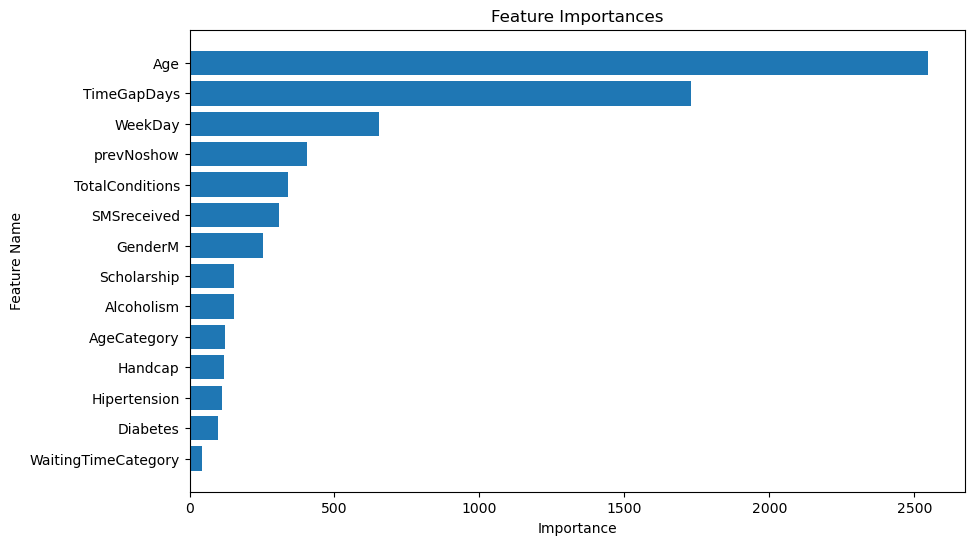

In [69]:
# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(feature_importance_df['Feature Name'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()